In [1]:
# pip install wordcloud

In [1]:
import pandas as pd
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords
# 워드클라우드 import
from wordcloud import WordCloud
# 데이터를 시각화 해주는 라이브러리
import matplotlib.pyplot as plt

In [3]:
# NLTK에서 불용어 목록 다운로드
nltk.download('stopwords')

# def get_word_frequencies(texts, stop_words):
#     words = []
#     for text in texts:
#         # 모든 단어를 소문자로 변환하고, 단어만 추출
#         words.extend(re.findall(r'\b\w+\b', text.lower()))
    
#     # 불용어를 제외한 단어만 남기기
#     filtered_words = [word for word in words if word not in stop_words]
    
#     # 단어 빈도 계산
#     word_counts = Counter(filtered_words)
    
#     # 빈도수 순으로 정렬
#     sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
    
#     return sorted_word_counts

# 영어 불용어 목록 가져오기
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\trainee230\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
# 단어 빈도 계산 함수
def get_word_frequencies(text_list, stop_words):
    word_count = Counter()
    for text in text_list:
        # 모든 문자를 소문자로 변환하고, 특수문자 및 숫자를 제거
        words = re.findall(r'\b\w+\b', text.lower())
        # Stop words를 제거
        filtered_words = [word for word in words if word not in stop_words]
        word_count.update(filtered_words)
    return word_count

In [4]:
df = pd.read_csv('amz_TV_전처리.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head(3)

,title,text,transformed_date,star,product_num,hp_data
0,Picture Quality and Sound effect,I had bought so many tv of LG from showroom......,"Aug, 2024",3,Dark Iron Gray,LG 80 cm HD Ready Smart LED TV 32LM563BPTC
1,It's an overpriced tv,The 14000 for the tv and 1000 extra for magic ...,"Aug, 2024",3,Dark Iron Gray,LG 80 cm HD Ready Smart LED TV 32LM563BPTC
2,Sound Quality not too good,"Good Apps, Color not too good and Sound qualit...","Aug, 2024",3,Dark Iron Gray,LG 80 cm HD Ready Smart LED TV 32LM563BPTC


In [5]:
# 모든 값을 문자열로 변환하여 처리
df['text'] = df['text'].astype(str)
df['title'] = df['title'].astype(str)

TV_low_star_df = df[(df['star'] == 1) | (df['star'] == 2)]
TV_high_star_df = df[(df['star'] == 3) | (df['star'] == 4) | (df['star'] == 5)]

In [7]:
stop_words.update(['lg', 'tv'])

In [8]:
TV_low_text = []
for i in TV_low_star_df['text']:
    TV_low_text.append(i)

TV_low_title = []
for i in TV_low_star_df['title']:
    TV_low_title.append(i)

TV_low_list = TV_low_text+TV_low_title

word_frequencies = get_word_frequencies(TV_low_list, stop_words)

word_frequencies

Counter({'product': 292,
         'quality': 268,
         'service': 267,
         'worst': 192,
         'amazon': 191,
         'good': 178,
         'customer': 161,
         'even': 158,
         'installation': 149,
         'buy': 134,
         'panel': 129,
         'experience': 126,
         'picture': 118,
         'sound': 112,
         'return': 112,
         'also': 110,
         '10': 107,
         'one': 96,
         'care': 95,
         'brand': 94,
         'time': 93,
         'technician': 92,
         'display': 90,
         'issue': 89,
         'days': 88,
         'defective': 88,
         'bad': 87,
         'get': 85,
         'remote': 83,
         'screen': 80,
         '1': 76,
         '2023': 75,
         'poor': 74,
         'working': 72,
         '3': 72,
         '5': 72,
         'video': 71,
         'warranty': 67,
         'like': 66,
         'delivered': 65,
         'pick': 65,
         'purchase': 64,
         'hai': 64,
         'delivery': 6

### TV 워드클라우드

In [10]:
wordcloud = WordCloud(font_path = 'C:\Windows\Fonts\HMKMRHD.TTF',
                      width = 700,
                      height = 700,
                      background_color = 'white',
                      colormap = 'spring',
                      random_state = 1).generate_from_frequencies(word_frequencies)

<function matplotlib.pyplot.show(close=None, block=None)>

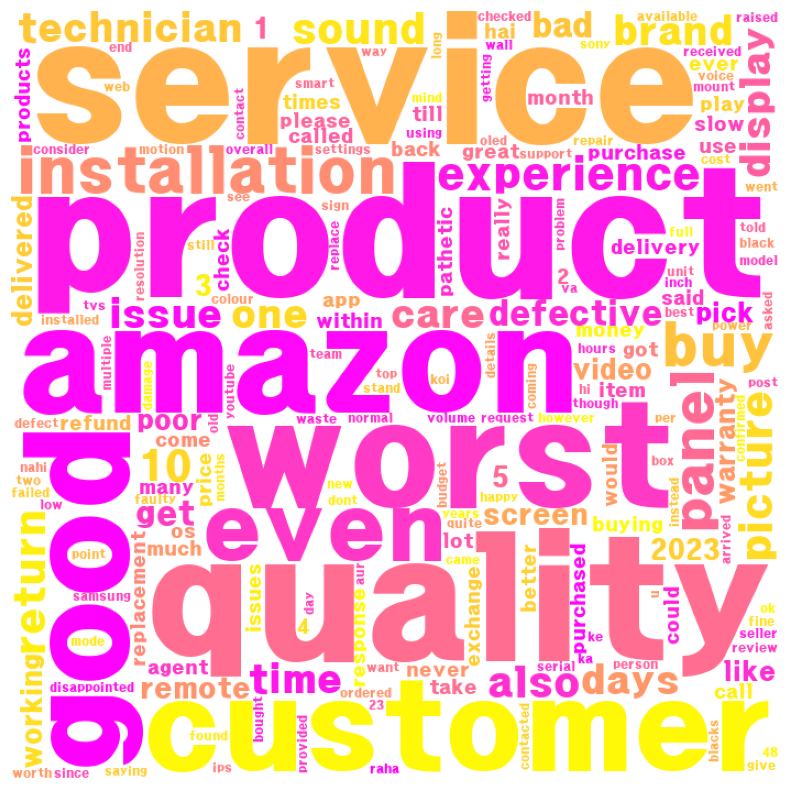

In [11]:
plt.figure(figsize = (10,10))
plt.imshow(wordcloud)
plt.axis("off")
# plt.title("quora - india investments community question", size = 13)
plt.show

### WashingMachine 워드클라우드

In [7]:
df = pd.read_csv('amz_wash_전처리.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head(3)

title_list = df['text']

# 모든 값을 문자열로 변환하여 처리
df['text'] = df['text'].astype(str)
df['title'] = df['title'].astype(str)

In [9]:
stop_words.update(['lg', 'washing','machine'])

In [11]:
WM_low_star_df = df[(df['star'] == 1) | (df['star'] == 2)]
WM_high_star_df = df[(df['star'] == 3) | (df['star'] == 4) | (df['star'] == 5)]

In [17]:
WM_low_text = []
for i in WM_low_star_df['text']:
    WM_low_text.append(i)

WM_low_title = []
for i in WM_low_star_df['title']:
    WM_low_title.append(i)

WM_low_list = WM_low_text+WM_low_title

word_frequencies = get_word_frequencies(WM_low_list, stop_words)
word_frequencies

Counter({'product': 371,
         'service': 207,
         'amazon': 169,
         'buy': 109,
         'good': 102,
         'worst': 93,
         'installation': 88,
         'customer': 87,
         'one': 82,
         'noise': 75,
         'also': 72,
         'working': 71,
         'days': 70,
         'time': 65,
         'bad': 63,
         'received': 61,
         'water': 60,
         'quality': 60,
         '2': 59,
         'damaged': 59,
         'wash': 57,
         'clothes': 57,
         'like': 52,
         'even': 50,
         'return': 49,
         'defective': 48,
         'technician': 46,
         'replacement': 44,
         'delivery': 44,
         'experience': 44,
         'model': 44,
         'got': 44,
         'drum': 42,
         'problem': 41,
         'item': 41,
         'properly': 40,
         'issue': 40,
         'much': 40,
         'delivered': 40,
         'get': 39,
         'load': 38,
         'care': 37,
         'new': 37,
         'র': 37,


<function matplotlib.pyplot.show(close=None, block=None)>

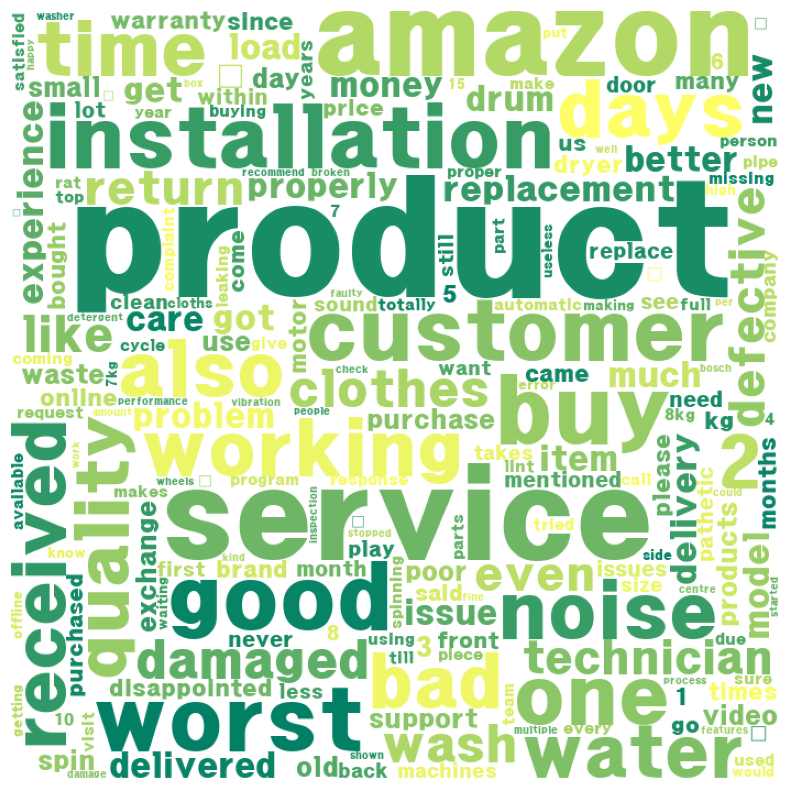

In [15]:
wordcloud = WordCloud(font_path = 'C:\Windows\Fonts\HMKMRHD.TTF',
                      width = 700,
                      height = 700,
                      background_color = 'white',
                      colormap = 'summer',
                      random_state = 1).generate_from_frequencies(word_frequencies)

plt.figure(figsize = (10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show

### Refrigerator 워드클라우드

In [25]:
df = pd.read_csv('amz_refri_전처리.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head(3)

title_list = df['text']

# 모든 값을 문자열로 변환하여 처리
df['text'] = df['text'].astype(str)
df['title'] = df['title'].astype(str)

In [27]:
stop_words.update(['lg', 'fridge'])

In [29]:
refri_low_star_df = df[(df['star'] == 1) | (df['star'] == 2)]
refri_high_star_df = df[(df['star'] == 3) | (df['star'] == 4) | (df['star'] == 5)]

In [31]:
refri_low_text = []
for i in refri_low_star_df['text']:
    refri_low_text.append(i)

refri_low_title = []
for i in refri_low_star_df['title']:
    refri_low_title.append(i)

refri_low_list = refri_low_text+refri_low_title

word_frequencies = get_word_frequencies(refri_low_list, stop_words)

word_frequencies

Counter({'product': 508,
         'service': 262,
         'refrigerator': 239,
         'amazon': 186,
         'buy': 176,
         'working': 166,
         'cooling': 153,
         'good': 118,
         'days': 117,
         'worst': 114,
         'bad': 101,
         'one': 98,
         'damaged': 94,
         'door': 93,
         'customer': 91,
         'compressor': 91,
         'issue': 84,
         'even': 82,
         'received': 80,
         'money': 77,
         'months': 77,
         'freezer': 76,
         'quality': 75,
         'poor': 74,
         'also': 73,
         'year': 72,
         '3': 71,
         'delivery': 69,
         'problem': 69,
         'time': 68,
         'side': 66,
         'within': 65,
         '2': 65,
         'installation': 65,
         'stopped': 65,
         'products': 64,
         'like': 61,
         'purchase': 61,
         'defective': 61,
         'delivered': 60,
         'replacement': 59,
         'please': 57,
         'ice': 54,

<function matplotlib.pyplot.show(close=None, block=None)>

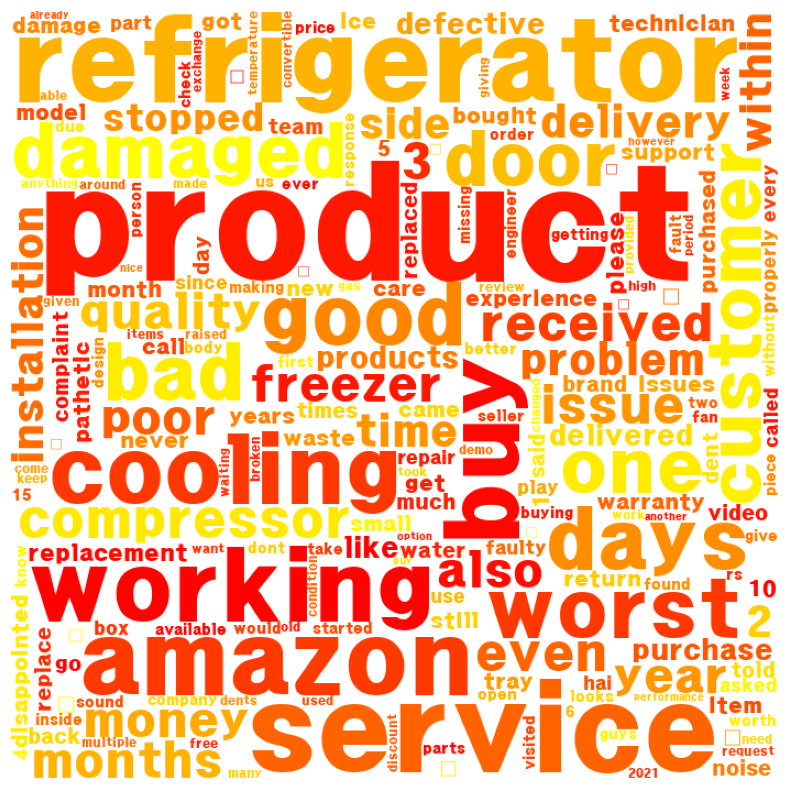

In [39]:
wordcloud = WordCloud(font_path = 'C:\Windows\Fonts\HMKMRHD.TTF',
                      width = 700,
                      height = 700,
                      background_color = 'white',
                      colormap = 'autumn',
                      random_state = 1).generate_from_frequencies(word_frequencies)

plt.figure(figsize = (10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show

### aircondition 워드클라우드

In [49]:
df = pd.read_csv('amz_air_전처리.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head(3)

title_list = df['text']

# 모든 값을 문자열로 변환하여 처리
df['text'] = df['text'].astype(str)
df['title'] = df['title'].astype(str)

In [51]:
stop_words.update(['lg', 'ac'])

In [53]:
ac_low_star_df = df[(df['star'] == 1) | (df['star'] == 2)]
ac_high_star_df = df[(df['star'] == 3) | (df['star'] == 4) | (df['star'] == 5)]

In [65]:
ac_low_text = []
for i in ac_low_star_df['text']:
    ac_low_text.append(i)

ac_low_title = []
for i in ac_low_star_df['title']:
    ac_low_title.append(i)

ac_low_list = ac_low_text+ac_low_title

word_frequencies = get_word_frequencies(ac_low_list, stop_words)

word_frequencies

Counter({'service': 386,
         'installation': 351,
         'product': 305,
         'cooling': 265,
         'customer': 150,
         'buy': 148,
         'amazon': 145,
         'worst': 139,
         'even': 135,
         'one': 129,
         '1': 104,
         'room': 102,
         'good': 99,
         'unit': 94,
         'also': 93,
         'bad': 93,
         'days': 89,
         'experience': 86,
         'technician': 84,
         '2': 84,
         'bought': 82,
         '5': 82,
         'care': 80,
         'money': 78,
         'gas': 77,
         'brand': 77,
         'time': 76,
         'months': 72,
         'copper': 69,
         'get': 69,
         'pipe': 67,
         'poor': 67,
         'issue': 66,
         'cool': 61,
         '3': 61,
         'air': 61,
         'came': 57,
         'year': 56,
         'please': 55,
         'pathetic': 55,
         'said': 54,
         'installed': 53,
         'working': 53,
         'products': 52,
         'call': 52

<function matplotlib.pyplot.show(close=None, block=None)>

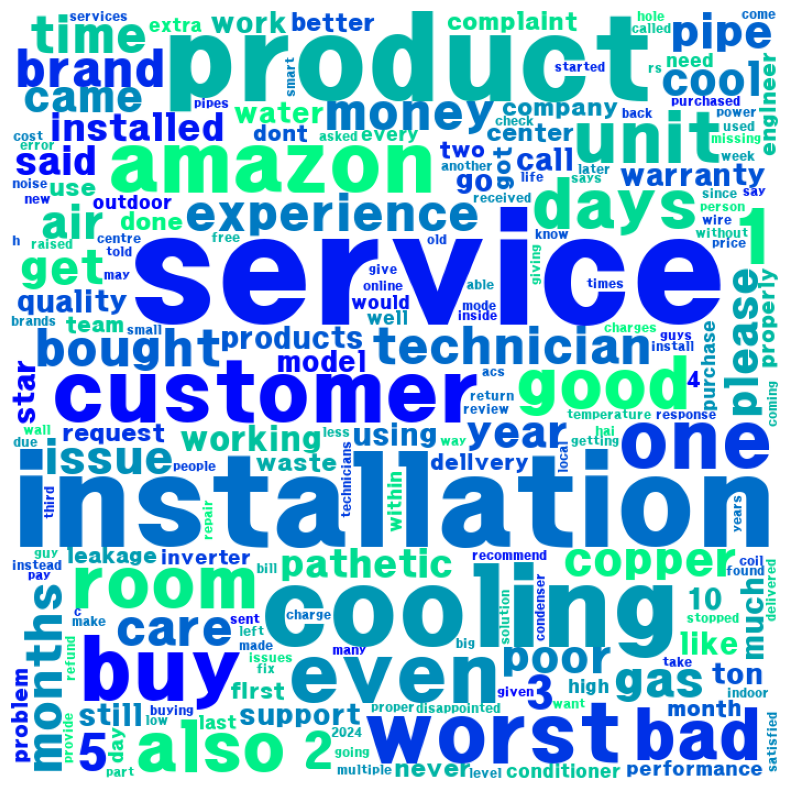

In [57]:
wordcloud = WordCloud(font_path = 'C:\Windows\Fonts\HMKMRHD.TTF',
                      width = 700,
                      height = 700,
                      background_color = 'white',
                      colormap = 'winter',
                      random_state = 1).generate_from_frequencies(word_frequencies)

plt.figure(figsize = (10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show